In [168]:
import pandas as pd 
import numpy as np 
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.mode.chained_assignment = None  # supress wanrings
pd.set_option('display.max_columns', 500)
companies = pd.read_csv("companies.txt",sep='	',engine="python")
rounds = pd.read_csv("rounds2.csv",engine="python")
companies.dropna(subset=['permalink'])
rounds.dropna(subset=['company_permalink'])

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00000
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00000
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00000
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.00000
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.00000
114946,/organization/ã�eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,nan
114947,/ORGANIZATION/Ã”ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.00000


In [169]:
unique_round_compnaies=len(list(rounds['company_permalink'].unique()))
print(unique_round_compnaies)

90247


In [170]:
unique_companies=len(list(companies['permalink'].unique()))
print(unique_companies)

66368


In [171]:
difference_companies = unique_round_compnaies-unique_companies
# difference_companies = companies['permalink'].str.lower().isin(rounds['company_permalink'].str.lower())

difference_companies

# print(difference_companies)
# rounds['company_permalink'].head()


23879

In [172]:
new_companies=companies.rename(columns={'permalink': 'company_permalink'})
new_companies['company_permalink'] = new_companies['company_permalink'].str.lower()
rounds['company_permalink'] = rounds['company_permalink'].str.lower()
master_frame = pd.merge(rounds,new_companies,how="inner",on="company_permalink")
len(master_frame)

114949

In [173]:
# Function to convert numbers to human redable values
import math

millnames = ['',' Thousand',' Million',' Billion',' Trillion']

def millionify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

In [174]:
fundingsMean = master_frame.pivot_table(values='raised_amount_usd',index='funding_round_type',aggfunc="mean")
fundingsMean['raised_amount_usd_humanRedable']=fundingsMean['raised_amount_usd'].apply(lambda x: millionify(x))
fundingsMean

,raised_amount_usd,raised_amount_usd_humanRedable
funding_round_type,,
angel,958694.46975,959 Thousand
convertible_note,1453438.54319,1 Million
debt_financing,17043526.02305,17 Million
equity_crowdfunding,538368.21091,538 Thousand
grant,4300576.33945,4 Million
non_equity_assistance,411203.05479,411 Thousand
post_ipo_debt,168704571.82237,169 Million
post_ipo_equity,82182493.87102,82 Million
private_equity,73308593.02944,73 Million


In [175]:
indexNames = master_frame[~master_frame['funding_round_type'].isin(['venture'])].index #filter venture FT
master_frame_filtered=master_frame.drop(indexNames)
master_frame_filtered

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00000,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00000,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00000,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00000,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114937,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.00000,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007
114941,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.00000,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN


In [176]:
highest_funding = master_frame_filtered.pivot_table(values='raised_amount_usd',index='country_code',aggfunc="sum")
highest_funding.sort_values(by=['raised_amount_usd'],ascending=False,inplace=True)
top9=highest_funding.head(9)
redableTop9=top9
redableTop9['raised_amount'] = top9['raised_amount_usd'].apply(lambda x: millionify(x)) #add a coloumn for human redable value
redableTop9

,raised_amount_usd,raised_amount
country_code,,
USA,422510842796.00000,423 Billion
CHN,39835418773.00000,40 Billion
GBR,20245627416.00000,20 Billion
IND,14391858718.00000,14 Billion
CAN,9583332317.00000,10 Billion
FRA,7259536732.00000,7 Billion
ISR,6907514579.00000,7 Billion
DEU,6346959822.00000,6 Billion
JPN,3363676611.00000,3 Billion


In [177]:
# Get primary Sector

master_frame_filtered.dropna(subset=['category_list'],axis=0,inplace=True)
primary_sector = master_frame_filtered['category_list'].apply(lambda row: row.split('|')[0]) 
master_frame_filtered['primary_sector']=pd.DataFrame(primary_sector)
master_frame_filtered.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00000,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00000,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software


In [178]:
#Convert mapping to long from wide type
sector_mapping=pd.read_csv("mapping.csv",engine="python")
sector_mapping = sector_mapping.melt(id_vars="category_list",var_name="master_category")
sector_mapping = sector_mapping.loc[~(sector_mapping["value"]==0) ]
sector_mapping=sector_mapping.drop(columns="value")
sector_mapping=sector_mapping.rename(columns={'category_list': 'primary_sector'})
sector_mapping

,primary_sector,master_category
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [179]:
master_frame_filtered = pd.merge(master_frame_filtered,sector_mapping,how="inner",on="primary_sector")


In [180]:
USA_index = master_frame_filtered[ (master_frame_filtered['raised_amount_usd'].isna() | master_frame_filtered['country_code'].isna()) | (~(master_frame_filtered['country_code'].isin(['USA']))) | ((master_frame_filtered['raised_amount_usd'] >= 5000000 ) & (master_frame_filtered['raised_amount_usd'] <= 15000000 ))].index
GBR_index = master_frame_filtered[ (master_frame_filtered['raised_amount_usd'].isna() | master_frame_filtered['country_code'].isna()) | (~(master_frame_filtered['country_code'].isin(['GBR']))) | ((master_frame_filtered['raised_amount_usd'] >= 5000000 ) & (master_frame_filtered['raised_amount_usd'] <= 15000000 ))].index
IND_index = master_frame_filtered[ (master_frame_filtered['raised_amount_usd'].isna() | master_frame_filtered['country_code'].isna()) | (~(master_frame_filtered['country_code'].isin(['IND']))) | ((master_frame_filtered['raised_amount_usd'] >= 5000000 ) & (master_frame_filtered['raised_amount_usd'] <= 15000000 ))].index

D1=master_frame_filtered.drop(USA_index)
D2=master_frame_filtered.drop(GBR_index)
D3=master_frame_filtered.drop(IND_index)
D3


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,master_category
32,/organization/manas-informatics,/funding-round/719e50301803d3918ffa558fc877e41c,venture,NaN,02-02-2008,160000.00000,Manas Informatic,http://www.topnews.in,Media|News,operating,IND,23,Mohali,Mohali,05-05-2007,Media,Entertainment
307,/organization/doormint,/funding-round/07ef4bbe43f9099323f7016c971e29ec,venture,A,05-08-2015,3000000.00000,DoorMint,http://doormint.in/,Apps,operating,IND,19,Bangalore,Bengaluru,01-01-2014,Apps,"News, Search and Messaging"
435,/organization/jugnoo,/funding-round/dd10cb9e69d8e441577a0c9ae6422e67,venture,B,17-11-2015,3000000.00000,JUGNOO,https://jugnoo.in/#/,Apps|Social Business|Software,operating,IND,5,Chandigarh,Chandigarh,01-11-2014,Apps,"News, Search and Messaging"
556,/organization/peppertap,/funding-round/fe0f32357b940f0ba74e39dcddada95c,venture,B,29-09-2015,36000000.00000,PepperTap,http://www.peppertap.com,Apps|Groceries|Online Shopping,operating,IND,10,New Delhi,Gurgaon,26-11-2014,Apps,"News, Search and Messaging"
597,/organization/railyatri,/funding-round/29aeff452a735cfd607dc58ddb93291a,venture,NaN,20-11-2014,486000.00000,RailYatri,http://RailYatri.in,Apps,operating,IND,36,New Delhi,Noida,01-01-2011,Apps,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50494,/organization/souqalmal,/funding-round/b05eca8d0bd96ccd5d8d8a15f776353d,venture,A,01-12-2013,1200000.00000,Souqalmal.com,http://www.souqalmal.com,Price Comparison,operating,IND,36,IND - Other,Dubai,21-05-2012,Price Comparison,"Social, Finance, Analytics, Advertising"
50639,/organization/mettl-com,/funding-round/61756ac3ceb6509881fb11bd58914220,venture,A,13-08-2012,4000000.00000,Mettl,http://www.mettl.com,Skill Assessment|Software|Testing,operating,IND,10,New Delhi,Gurgaon,24-09-2009,Skill Assessment,Others
50741,/organization/revx,/funding-round/b2082b47ea0926269c740e189546ac84,venture,NaN,25-08-2015,4000000.00000,RevX,http://www.revx.io,Mobile Advertising,operating,IND,19,Bangalore,Bangalore,01-01-2013,Mobile Advertising,"Social, Finance, Analytics, Advertising"
50774,/organization/swajal,/funding-round/aec61eeb145ab8ba222113df16c83fc4,venture,A,03-08-2015,1200000.00000,Swajal,http://swajal.in/,Water Purification,operating,IND,10,New Delhi,Gurgaon,01-01-2011,Water Purification,Cleantech / Semiconductors


In [181]:
D1['count_main_sector'] = D1['raised_amount_usd'].groupby(D1['master_category']).transform('count')
D1['total_amount_main_sector'] =D1['raised_amount_usd'].groupby(D1['master_category']).transform('sum')

D2['count_main_sector'] = D2['raised_amount_usd'].groupby(D2['master_category']).transform('count')
D2['total_amount_main_sector'] =D2['raised_amount_usd'].groupby(D2['master_category']).transform('sum')

D3['count_main_sector'] = D3['raised_amount_usd'].groupby(D3['master_category']).transform('count')
D3['total_amount_main_sector'] =D3['raised_amount_usd'].groupby(D3['master_category']).transform('sum')

D1.dropna(subset=['raised_amount_usd'],inplace=True)
D2.dropna(subset=['raised_amount_usd'],inplace=True)
D3.dropna(subset=['raised_amount_usd'],inplace=True)

In [182]:
# Get count and total amount invested in top 3 english speaking countries
print(D1['raised_amount_usd'].count())
print(D2['raised_amount_usd'].count())
print(D3['raised_amount_usd'].count())
print(millionify(D1['raised_amount_usd'].sum()))
print(millionify(D2['raised_amount_usd'].sum()))
print(millionify(D3['raised_amount_usd'].sum()))





22377
1339
446
293 Billion
14 Billion
11 Billion


In [183]:
# Get top sectors in our Top 3 countries
Sector_count_winners = D1.sort_values(['count_main_sector'],ascending=False).groupby('master_category')
topSectors1=Sector_count_winners.head(1).reset_index()
print(topSectors1[0:3][['master_category','count_main_sector']])

Sector_count_winners2 = D2.sort_values(['count_main_sector'],ascending=False).groupby('master_category')
Sector_count_winners2.head(1)
topSectors2=Sector_count_winners2.head(1).reset_index()
print(topSectors2[0:3][['master_category','count_main_sector']])

Sector_count_winners3 = D3.sort_values(['count_main_sector'],ascending=False).groupby('master_category')
topSectors3=Sector_count_winners3.head(1).reset_index()
print(topSectors3[0:3][['master_category','count_main_sector']])


                           master_category  count_main_sector
0               Cleantech / Semiconductors               5552
1                                   Others               5320
2  Social, Finance, Analytics, Advertising               3244
                           master_category  count_main_sector
0                                   Others                364
1               Cleantech / Semiconductors                306
2  Social, Finance, Analytics, Advertising                220
                           master_category  count_main_sector
0                                   Others                172
1               News, Search and Messaging                 78
2  Social, Finance, Analytics, Advertising                 45


In [184]:
filteredtopSectorCompanies1=D1.loc[D1['master_category'].isin(topSectors1[0:3]['master_category'])]

filteredtopSectorCompanies2=D2.loc[D2['master_category'].isin(topSectors2[0:3]['master_category'])]
filteredtopSectorCompanies3=D3.loc[D3['master_category'].isin(topSectors3[0:3]['master_category'])]


In [185]:
#Get top companies in 1st and 2nd most invested sector for all countries
topSectorC1Copanies=filteredtopSectorCompanies1[filteredtopSectorCompanies1['master_category']==topSectors1.iloc[0]['master_category']]['company_permalink'].value_counts().reset_index()
topSectorC2Copanies=filteredtopSectorCompanies2[filteredtopSectorCompanies2['master_category']==topSectors2.iloc[0]['master_category']]['company_permalink'].value_counts().reset_index()

topSectorC3Copanies=filteredtopSectorCompanies3[filteredtopSectorCompanies3['master_category']==topSectors3.iloc[0]['master_category']]['company_permalink'].value_counts().reset_index()

SecondSectorC1Copanies=filteredtopSectorCompanies1[filteredtopSectorCompanies1['master_category']==topSectors1.iloc[1]['master_category']]['company_permalink'].value_counts().reset_index()
SecondSectorC2Copanies=filteredtopSectorCompanies2[filteredtopSectorCompanies2['master_category']==topSectors2.iloc[1]['master_category']]['company_permalink'].value_counts().reset_index()

SecondSectorC3Copanies=filteredtopSectorCompanies3[filteredtopSectorCompanies3['master_category']==topSectors3.iloc[1]['master_category']]['company_permalink'].value_counts().reset_index()



# for finding names of company
# 
# top sector C1 companies
print(companies[companies['permalink'].str.lower() == topSectorC1Copanies.iloc[0]['index']]['name'])
print(companies[companies['permalink'].str.lower() == topSectorC1Copanies.iloc[1]['index']]['name'])

# Secnond sector c1 companies
print(companies[companies['permalink'].str.lower() == SecondSectorC1Copanies.iloc[0]['index']]['name'])
print(companies[companies['permalink'].str.lower() == SecondSectorC1Copanies.iloc[1]['index']]['name'])

# top sector C2 companies
print(companies[companies['permalink'].str.lower() == topC2Copanies.iloc[0]['index']]['name'])

# Secnond sector c2 companies
print(companies[companies['permalink'].str.lower() == SecondSectorC2Copanies.iloc[0]['index']]['name'])
print(companies[companies['permalink'].str.lower() == SecondSectorC2Copanies.iloc[1]['index']]['name'])

# top sector C3 companies
print(companies[companies['permalink'].str.lower() == topC3Copanies.iloc[0]['index']]['name'])

# Secnond sector c3 companies
print(companies[companies['permalink'].str.lower() == SecondSectorC3Copanies.iloc[0]['index']]['name'])


13583    Covenant Surgical Partners
Name: name, dtype: object
45254    Galectin Therapeutics
Name: name, dtype: object
57064    Terascala
Name: name, dtype: object
61280    VectorMAX
Name: name, dtype: object
48892    Rostima
Name: name, dtype: object
51945    Sirigen
Name: name, dtype: object
41841    Oxford BioTherapeutics
Name: name, dtype: object
20874    Flipkart
Name: name, dtype: object
46518    Quikr
Name: name, dtype: object


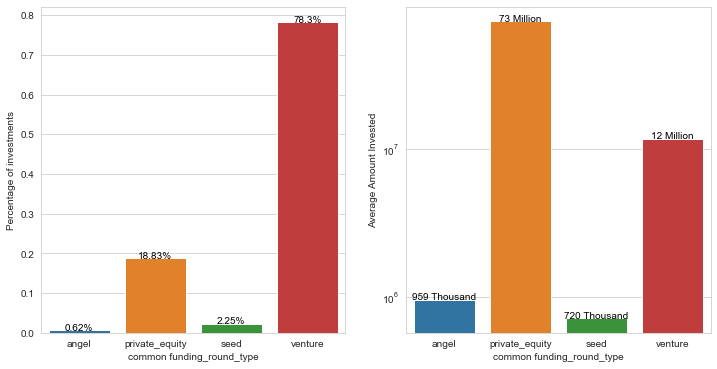

In [186]:
def percentage(n):
    return n*100

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plotData=master_frame[master_frame['funding_round_type'].isin(['venture','seed','angel','private_equity'])]
Total=plotData['raised_amount_usd'].sum()
finalPlot=plotData.groupby("funding_round_type").agg(Mean=('raised_amount_usd', 'mean'), Sum=('raised_amount_usd', 'sum')).reset_index()
finalPlot['fraction']=finalPlot['Sum']/Total

f, axes = plt.subplots(1, 2,figsize=(12,6))
g1=sns.barplot(  y="fraction", x= "funding_round_type", data=finalPlot, ax=axes[0])
g1.set(xlabel='common funding_round_type', ylabel='Percentage of investments')

g2=sns.barplot( y="Mean", x= "funding_round_type", data=finalPlot, ax=axes[1])
g2.set(xlabel='common funding_round_type', ylabel='Average Amount Invested')

plt.yscale('log')
#Giving annotations
for index, row in finalPlot.iterrows():
    g1.text(row.name,row.fraction, str(round(percentage(row.fraction),2)) + "%", color='black', ha="center")
for index, row in finalPlot.iterrows():
    g2.text(row.name,row.Mean, millionify(row.Mean), color='black', ha="center")

plt.show()

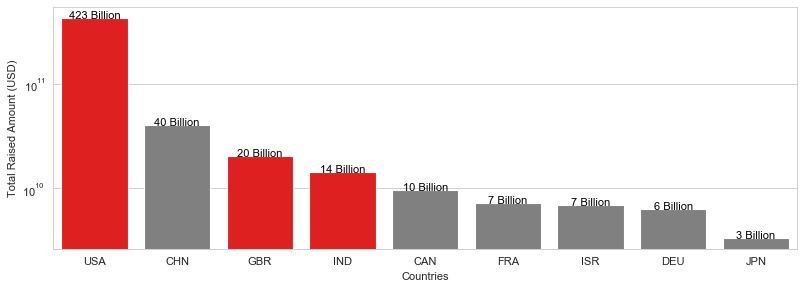

In [187]:
top9Plot=top9

top9Plot.reset_index(inplace=True)
plt.figure(num=None,figsize=(12,4),dpi=80)
EnglishSpeaking=['USA','GBR','IND']
clrs = ['red' if (x in EnglishSpeaking ) else 'grey' for x in top9Plot['country_code'] ]

top9bar=sns.barplot(  y="raised_amount_usd", x= "country_code", data=top9Plot,palette=clrs)
plt.yscale('log')
top9bar.set(xlabel='Countries', ylabel='Total Raised Amount (USD)')


for index, row in top9Plot.iterrows():
    top9bar.text(row.name,row.raised_amount_usd, millionify(round(row.raised_amount_usd,2)), color='black', ha="center")


plt.show()


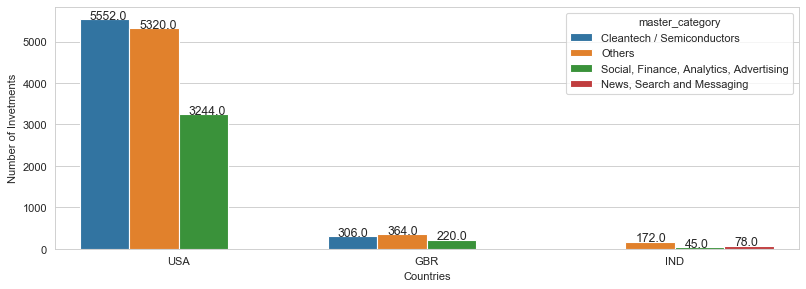

In [188]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.ERROR)
Top3Countries=pd.DataFrame({

 'country_code':['USA','GBR','IND']})

Top3Countries1 = pd.merge(Top3Countries,topSectors1[0:3],how="left",on="country_code").dropna(subset=['master_category'])
Top3Countries2 = pd.merge(Top3Countries,topSectors2[0:3],how="left",on="country_code").dropna(subset=['master_category'])
Top3Countries3 = pd.merge(Top3Countries,topSectors3[0:3],how="left",on="country_code").dropna(subset=['master_category'])

final_plot=Top3Countries1.append(Top3Countries2).append(Top3Countries3)
plt.figure(num=None,figsize=(12,4),dpi=80)

barObject=sns.barplot(  y="count_main_sector", x= "country_code",hue="master_category", data=final_plot)
barObject.set(xlabel='Countries', ylabel='Number of Invetments')

for i in barObject.patches:
    barObject.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=11)
